 ## CH4 Spectra to visualize the filter of a passive gas camera

*Script to illustrate the filter width of a passive gas camera*

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path
import matplotlib
import configparser
os.chdir('..')
from classes import Spectra, Observer, HiddenPrints

In [2]:
%%capture
#%% 1. create a spectrum
my_spectrum = Spectra(name = 'CH4_passiver_gas_camera_filter')

#%% 2. add an observer
my_spectrum.observer = Observer(unit  = 'lam',      #'wav' : wavenumer [1/cm] | 'lam' : wavelength [nm].
                                lower = 3080.  , #lower =  3260.,    
                                upper = 3530,  #upper =  3260.6,   
                                )
#%% 3. add gas_cells (may consist of multiple gasses) with gasses

# cell 1
my_spectrum.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 1,            # atm. Default is 1
                         length         = 100,           # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1

my_spectrum.gas_cells[-1].add_gas(gas_name  = "H2O",    # as in hitran
                                VMR        = 20E-2)    # E-6 = ppm 

# cell 0
my_spectrum.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 1,            # atm. Default is 1
                         length         = 100,           # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1

my_spectrum.gas_cells[-1].add_gas(gas_name  = "CH4",    # as in hitran
                                VMR        = 1000E-6)    # E-6 = ppm 




#%% 4. download (running hapi functions)
my_spectrum.download(line_list = False,         # by setting to false, the linelist will nor be downloaded nor plotted.
                     step      = 0.02         # The step size determines the resolution of the graph. It is in the unit of wavenumbers (1/cm).
                    )  



To double check that everything is as desired, you can print a summary of your setup.

The plot function may be adjusted to ones needs.
If line list has not been downloaded (step 4), it will not be plotted.

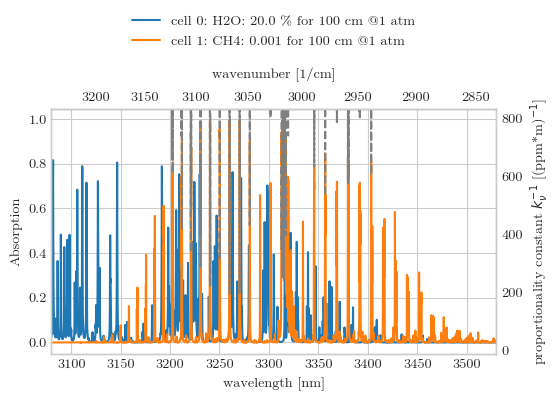

In [3]:
#%% 5. plot prop const
#matplotlib.rc_file(Path('C:/Users/i13500029/OneDrive - Endress+Hauser/Python/Figures_git/uni_layout_rc'))
config = configparser.ConfigParser()
config.read('C:/Users/i13500029/OneDrive - Endress+Hauser/Python/Figures_git/uni_layout_rc')
matplotlib.rcParams.update(config['halfsize'])

a = my_spectrum.plot(#figsize = (246/72, 246 *10/8 / 72),
                figsize = (5.708662653936627, 4.281496990),
                 export = True,
                 fontsize = 10,
                 absorbance = False,
                 prop_const = True,
                )
#a.axvline(x=3260.15766, color = 'darkred') # fact 0.55
#a.axvline(x=3260.19, color = 'darkred') # fact 0.4
#a.axvline(x=3260.23, color = 'darkred') # fact 0.3